In [3]:
%%time
# just in-case installs
!pip install -U matplotlib
!pip install -U bioinfokit
!pip install -U yellowbrick
!pip install -U statsmodels

CPU times: total: 156 ms
Wall time: 1min 10s


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from warnings import filterwarnings
filterwarnings("ignore")

In [5]:
df=pd.read_csv('fuel.csv')

In [6]:

df.head(5)

,Model Year,Mfr Name,Division,Carline,Verify Mfr Cd,Index (Model Type Index),Eng Displ,# Cyl,Transmission,City FE (Guide) - Conventional Fuel,...,City CO2 Rounded Adjusted,Hwy CO2 Rounded Adjusted,Comb CO2 Rounded Adjusted (as shown on FE Label),CO2-PHEV Composite Rounded Adjusted Combined CO2,240V Charge Time at 240 volts (hours),120V Charge time at 120 Volts (hours),PHEV Total Driving Range (rounded to nearest 10 miles)DISTANCE,City PHEV Composite MPGe,Hwy PHEV Composite MPGe,Comb PHEV Composite MPGe
0,2021,Honda,Acura,NSX,HNX,39,3.5,6,Auto(AM-S9),21,...,420,406,420,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,aston martin,Aston Martin Lagonda Ltd,Vantage Manual,ASX,5,4.0,8,Manual(M7),14,...,636,426,541,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,aston martin,Aston Martin Lagonda Ltd,Vantage V8,ASX,4,4.0,8,Auto(S8),18,...,494,364,435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,Volkswagen Group of,Audi,R8,VGA,5,5.2,10,Auto(AM-S7),13,...,663,450,567,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,Volkswagen Group of,Audi,R8 2WD,VGA,7,5.2,10,Auto(AM-S7),14,...,645,386,528,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['City CO2 Rounded Adjusted'].value_counts()

422    15
461    12
403    12
484    11
490     9
       ..
253     1
266     1
280     1
324     1
697     1
Name: City CO2 Rounded Adjusted, Length: 399, dtype: int64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def EDA(df, figuresize):
    cat = []
    con = []
    from warnings import filterwarnings
    filterwarnings("ignore")
    u = int((df.shape[1] + 1) / 2)
    plt.figure(figsize=figuresize)
    x = 1

    for i in df.columns:
        if df[i].dtypes == "object":
            cat.append(i)
            plt.subplot(u, 2, x)
            x = x + 1
            sns.countplot(data=df, x=i)
        else:
            con.append(i)

    for i in con:
        plt.subplot(u, 2, x)
        x = x + 1
        sns.distplot(df[i].dropna(), kde=False)  

    print(df[con].corr())


                                                    Model Year  \
Model Year                                                 NaN   
Index (Model Type Index)                                   NaN   
Eng Displ                                                  NaN   
# Cyl                                                      NaN   
City FE (Guide) - Conventional Fuel                        NaN   
...                                                        ...   
120V Charge time at 120 Volts (hours)                      NaN   
PHEV Total Driving Range (rounded to nearest 10...         NaN   
City PHEV Composite MPGe                                   NaN   
Hwy PHEV Composite MPGe                                    NaN   
Comb PHEV Composite MPGe                                   NaN   

                                                    Index (Model Type Index)  \
Model Year                                                               NaN   
Index (Model Type Index)                       

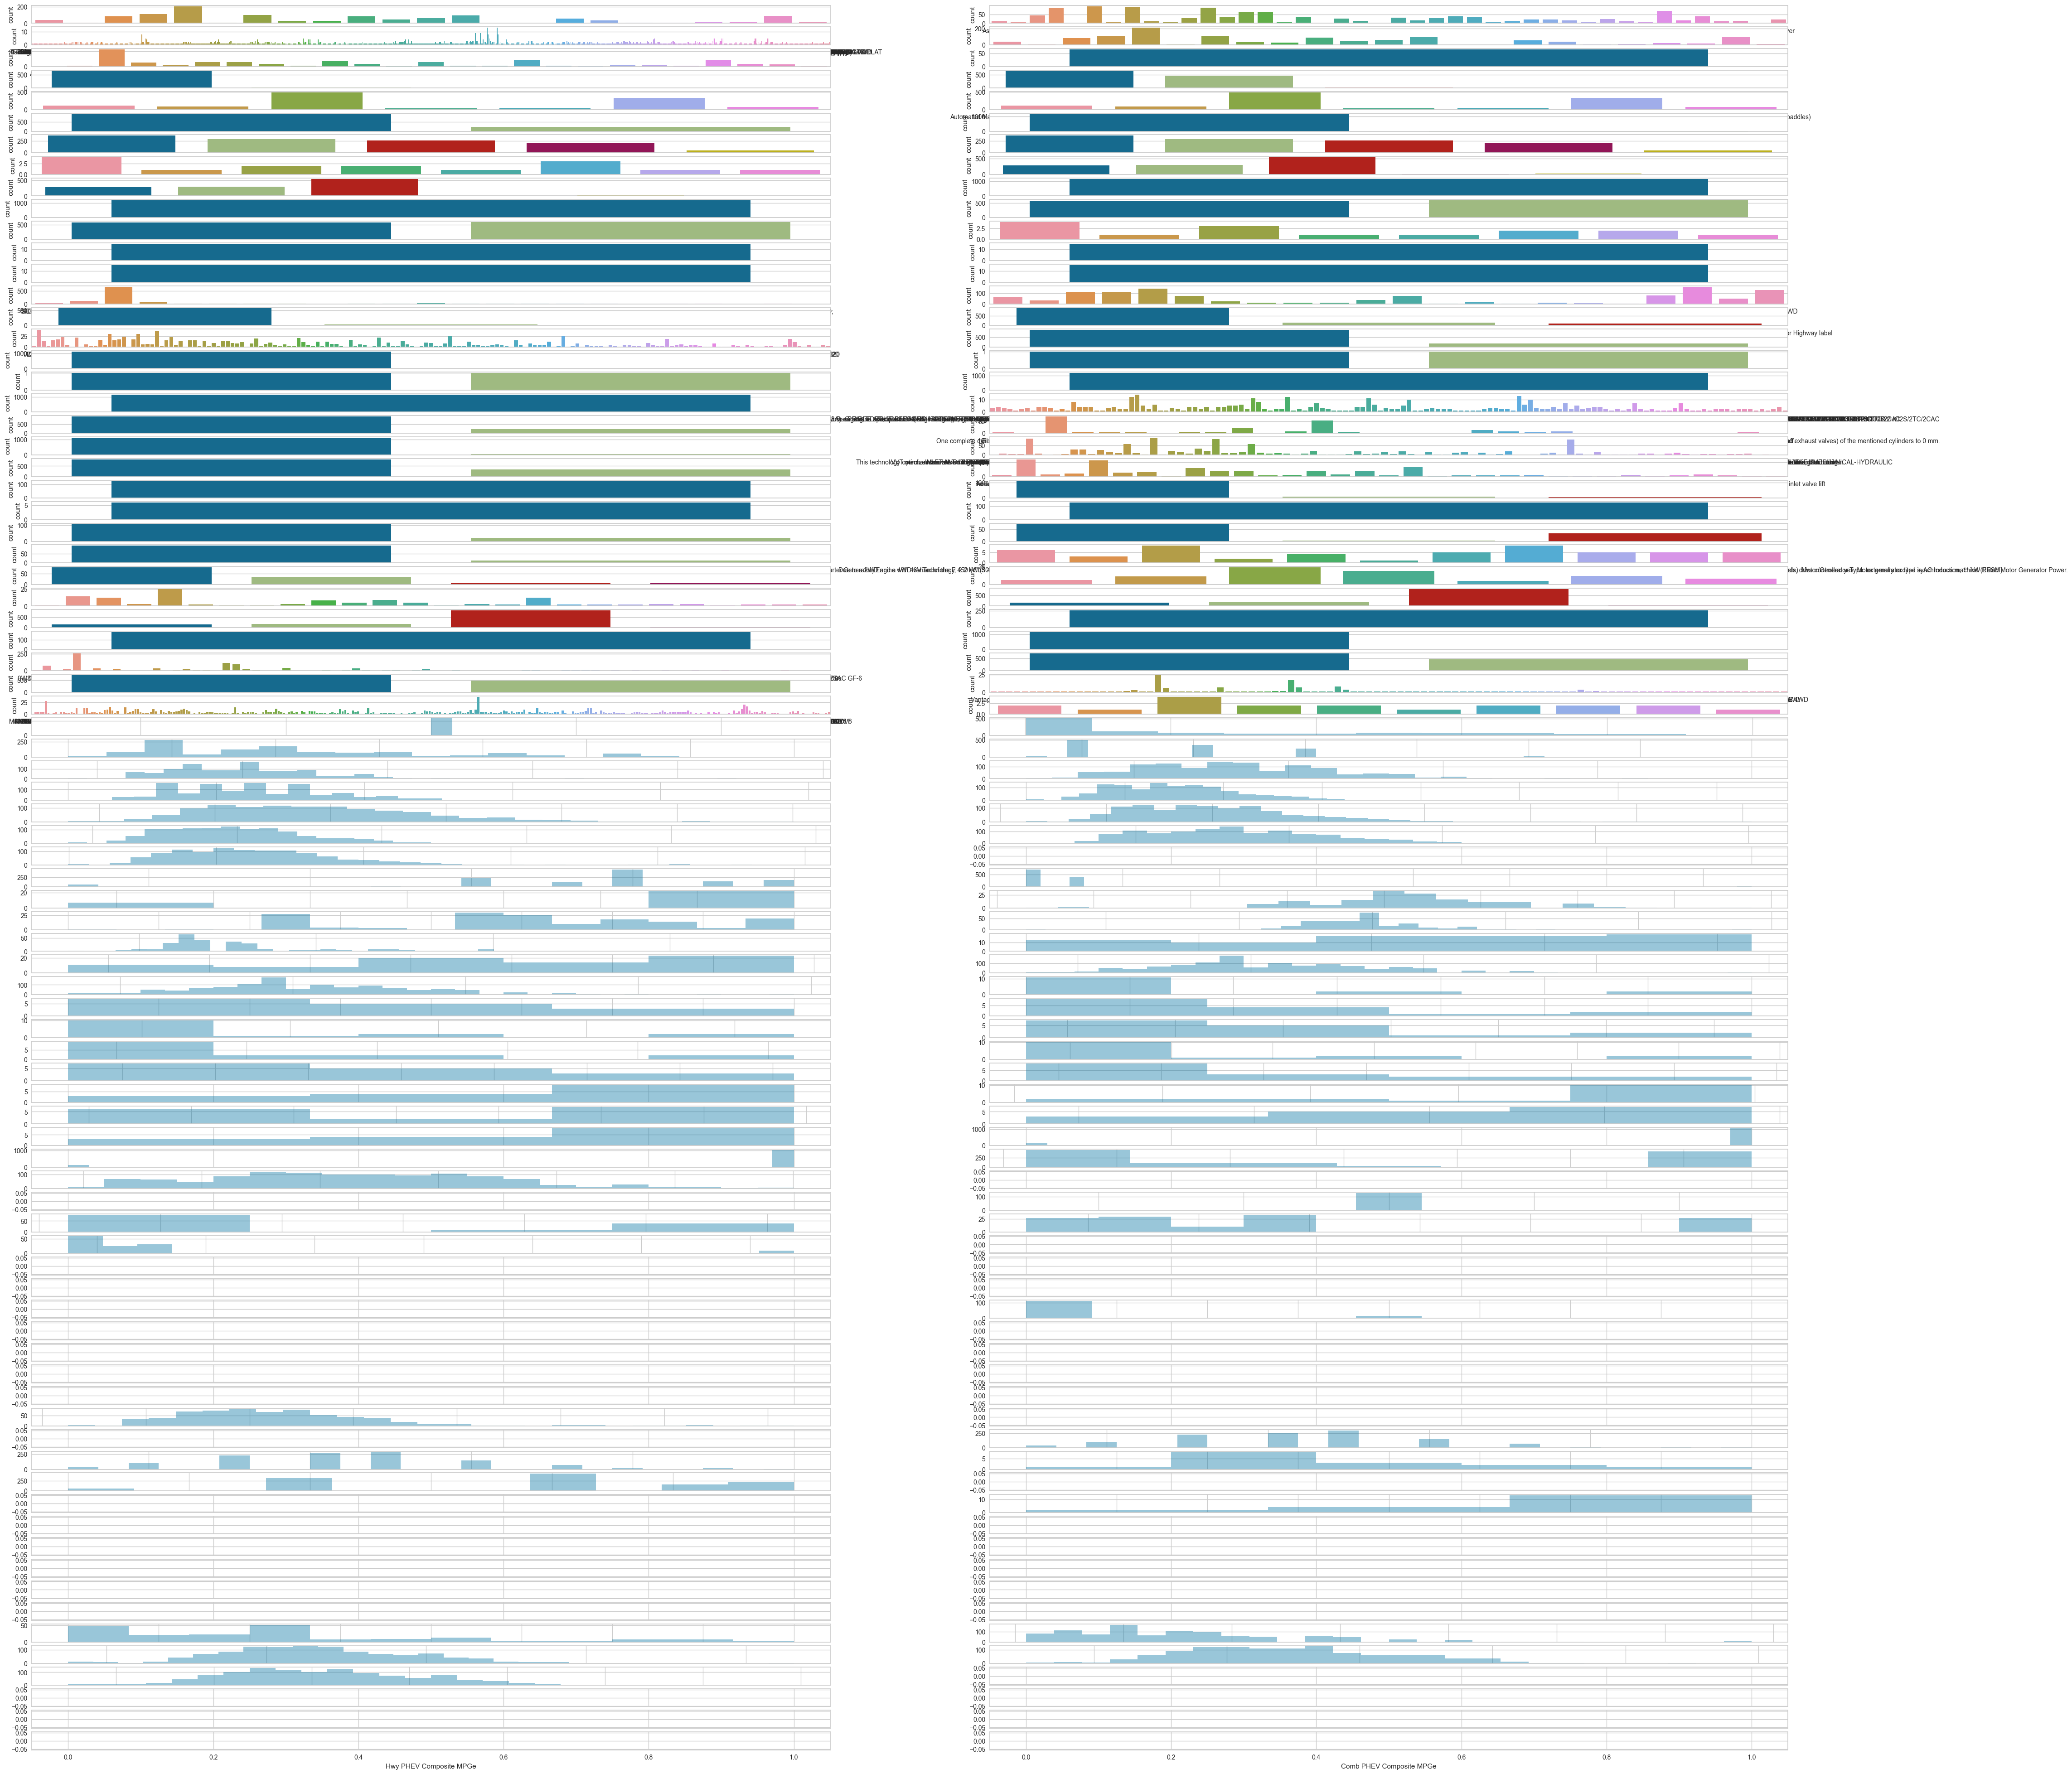

In [11]:
EDA(df, (50, 50))

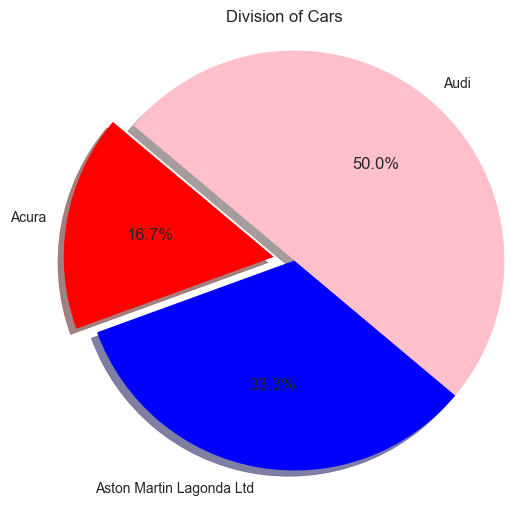

In [21]:
import matplotlib.pyplot as plt

# Sample data for the pie chart
labels = ['Acura', 'Aston Martin Lagonda Ltd', 'Audi']
sizes = [15, 30, 45]  # The sizes or proportions of each slice
colors = ['red', 'blue', 'pink']  # Colors for each slice
explode = (0.1, 0, 0)  # To explode a slice (e.g., the 1st slice)

# Create a pie chart
plt.figure(figsize=(6, 6))  # Optional: Set the figure size
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Add a title
plt.title('Division of Cars')

# Display the pie chart
plt.show()


In [22]:
df1 = df.drop(labels=['Model Year','Mfr Name','Division','Carline'], axis=1) 

df1.head(5)


,Verify Mfr Cd,Index (Model Type Index),Eng Displ,# Cyl,Transmission,City FE (Guide) - Conventional Fuel,Hwy FE (Guide) - Conventional Fuel,Comb FE (Guide) - Conventional Fuel,City Unadj FE - Conventional Fuel,Hwy Unadj FE - Conventional Fuel,...,City CO2 Rounded Adjusted,Hwy CO2 Rounded Adjusted,Comb CO2 Rounded Adjusted (as shown on FE Label),CO2-PHEV Composite Rounded Adjusted Combined CO2,240V Charge Time at 240 volts (hours),120V Charge time at 120 Volts (hours),PHEV Total Driving Range (rounded to nearest 10 miles)DISTANCE,City PHEV Composite MPGe,Hwy PHEV Composite MPGe,Comb PHEV Composite MPGe
0,HNX,39,3.5,6,Auto(AM-S9),21,22,21,28.7000,30.2000,...,420,406,420,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ASX,5,4.0,8,Manual(M7),14,21,17,17.3588,29.2584,...,636,426,541,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ASX,4,4.0,8,Auto(S8),18,24,20,22.5379,34.2945,...,494,364,435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,VGA,5,5.2,10,Auto(AM-S7),13,20,16,15.8765,26.0378,...,663,450,567,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,VGA,7,5.2,10,Auto(AM-S7),14,23,17,15.8768,29.6317,...,645,386,528,NaN,NaN,NaN,NaN,NaN,NaN,NaN


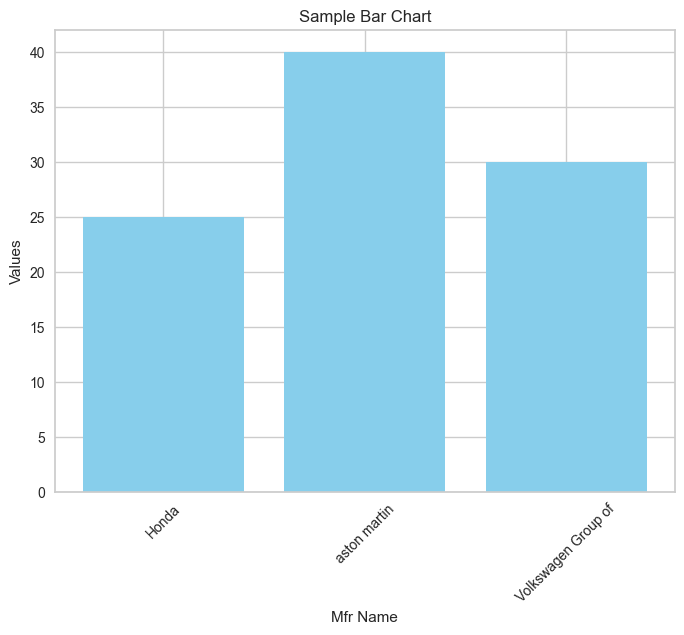

In [25]:
import matplotlib.pyplot as plt

# Sample data for the bar chart
categories = ['Honda', 'aston martin', 'Volkswagen Group of']
values = [25, 40, 30]

# Create a bar chart
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.bar(categories, values, color='skyblue')

# Add labels and title
plt.xlabel('Mfr Name')
plt.ylabel('Values')
plt.title('Sample Bar Chart')

# Display the bar chart
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()


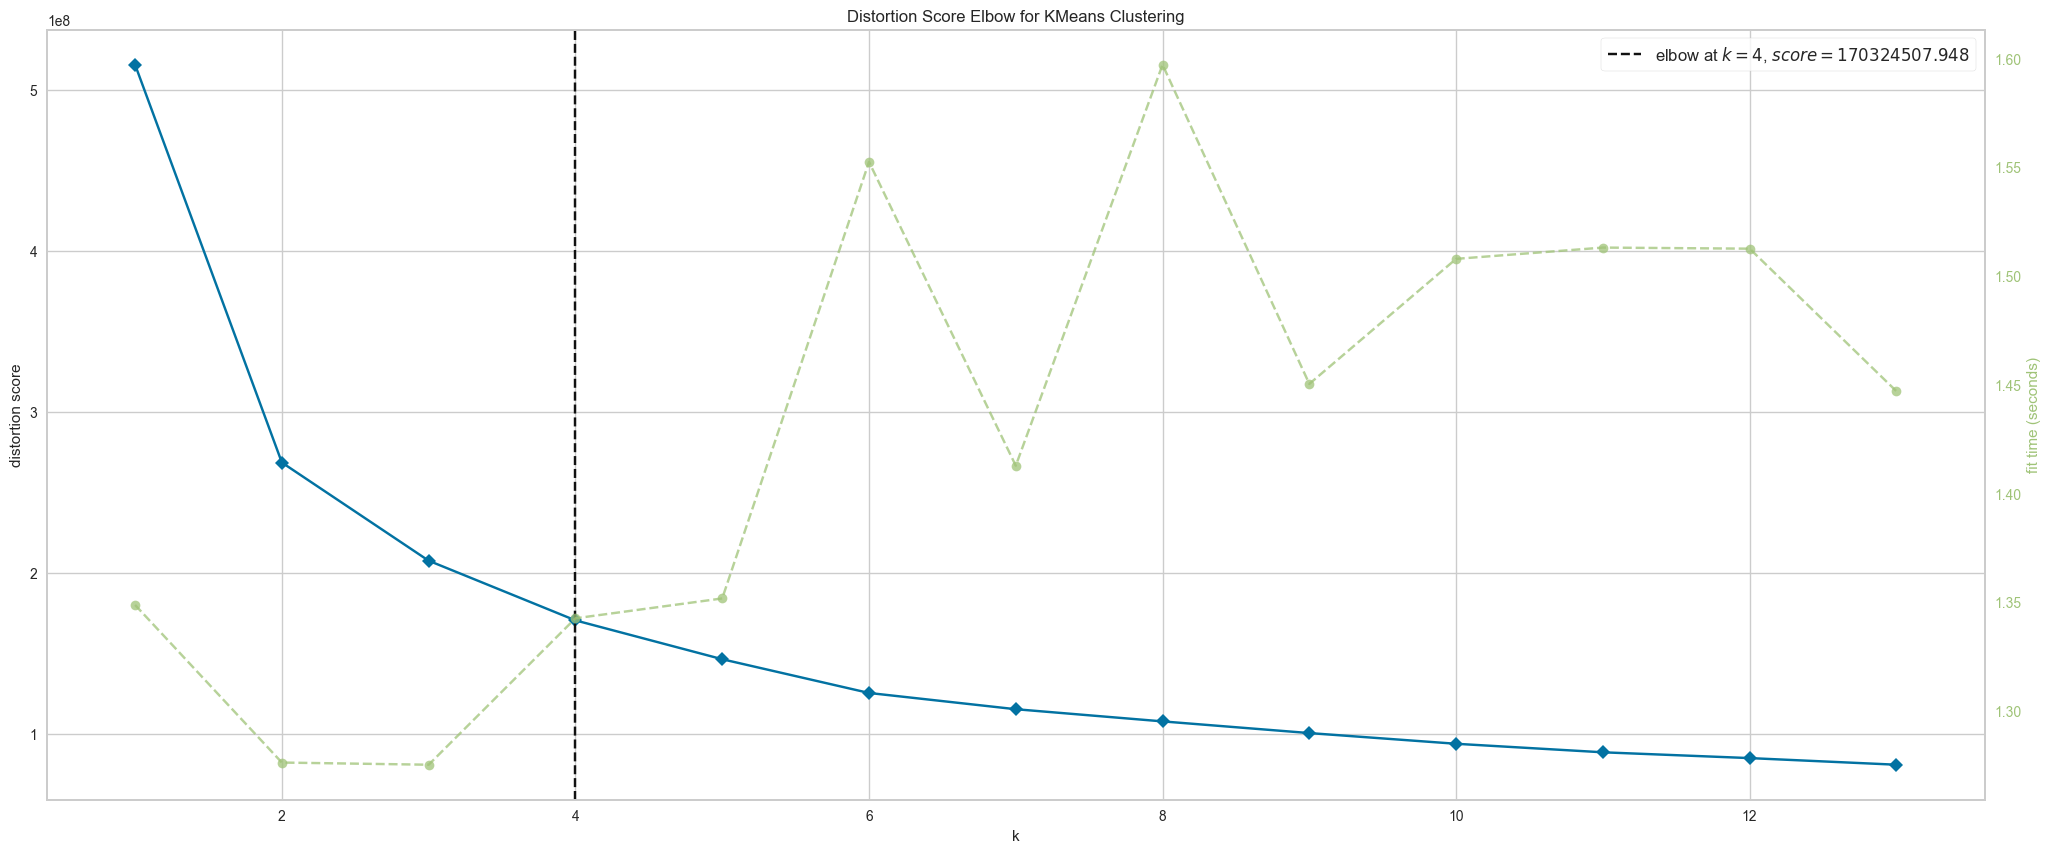

In [26]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,14)).fit(df_encoded)
visualizer.show();

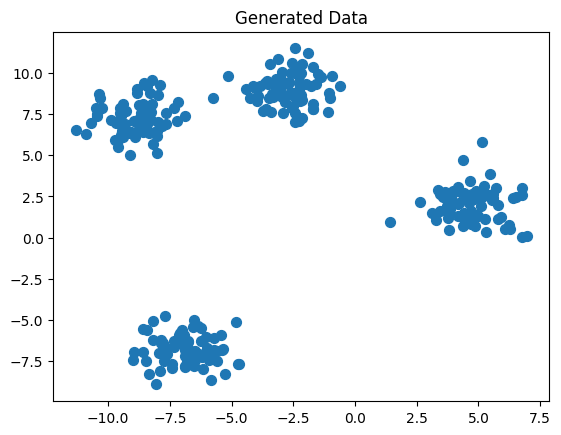

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


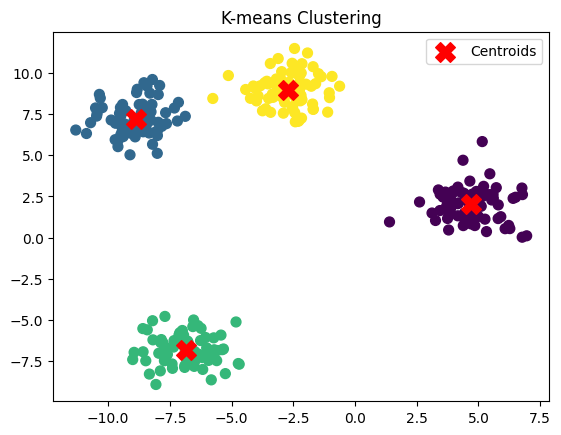

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate sample data
data, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Visualize the data
plt.scatter(data[:, 0], data[:, 1], s=50)
plt.title("Generated Data")
plt.show()

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data)

# Get cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualize the clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-means Clustering")
plt.legend()
plt.show()
